In [149]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from PIL import ImageFont
from PIL import ImageDraw 
import glob
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 7) #(width,height)
plt.rcParams['axes.grid'] = True
plt.rcParams['text.usetex'] = True

In [243]:
def salva_imagem_com_predicao(imagem, img_filename, predicao):
  img = Image.fromarray(imagem[:,:,:])

  draw = ImageDraw.Draw(img)
  font = ImageFont.truetype("FreeMono.ttf", 11)
  fillcolor = "black"
  shadowcolor = "white"
  x, y = 1, 1

  text = "{:.3f}".format(predicao)

  # thin border
  draw.text((x-1, y), text, font=font, fill=shadowcolor)
  draw.text((x+1, y), text, font=font, fill=shadowcolor)
  draw.text((x, y-1), text, font=font, fill=shadowcolor)
  draw.text((x, y+1), text, font=font, fill=shadowcolor)

  # thicker border
  draw.text((x-1, y-1), text, font=font, fill=shadowcolor)
  draw.text((x+1, y-1), text, font=font, fill=shadowcolor)
  draw.text((x-1, y+1), text, font=font, fill=shadowcolor)
  draw.text((x+1, y+1), text, font=font, fill=shadowcolor)

  draw.text((x, y), text, font=font, fill=fillcolor)

  img.save(img_filename)

In [244]:
#todas as imagens sao submetidas ao treino a mesma qtd de iteracoes, ou seja, o num_it, logo, o algoritmo vai ver a mesma
#imagens NUM_IT vezes, então, ele vai ser treinado e testado com o mesmo dataset, logo, ele vai saber o que é um gato
#e o que nao e um gato

#eventualmente ele vai decorar pq ta sempre passando os mesmos pixels

#o metodo de pixels pra esssa tecnica aprende, pq ele decora as imagens, ou seja, cada pixel de cada imagem, pq ele ve 
# a msm imagems NUM_ITvezes,(vetorzao)

#overfit, ajusto meu modelo para os dados de treinamento; logo, ele so vai conseguir identificar esses dados que ele viu

#normalizacao dos valores ficam entre 0 e 1 por causa da sigmoide, os valores variam entre 0 e 1; logo, nao faria sentido
#eu normalizar os dados e eles nao ficarem nessa escala, por isso, se atentar a isso!
def logistic_regression(NUM_IT, alpha, m, X, Y, theta):
    J = np.zeros(NUM_IT)
    acc = np.zeros(NUM_IT)    
    for i in range(NUM_IT):
        z = np.dot(X,theta)
        H_theta = np.divide(1,1+np.exp(-z)) #nessa parte, a gente submete ele a teste depois de treinado.
        E = H_theta - Y
        J[i] = (1/m)*np.sum(-Y*np.log(H_theta) - (1-Y)*(np.log(1-H_theta)))
        theta = theta - (alpha*(np.dot(X.T,E))) 
        acc[i] = np.sum((H_theta >= 0.5) == Y)/m
    return J, H_theta, acc

In [245]:
dir_cat = '../inputs/data/train/cat/*.png'
dir_noncat = '../inputs/data/train/noncat/*.png'

Temos que a regressão logística serve para classificar uma determinada classe, logo, para cada gato adicionado nos dados de treino, vamos adicionar um valor 1 aos dados de teste, pois isso significa que é um gato(true), e para cada não-gato adicionado aos dados de treino, vamos adicionar um 0 nos dados de teste, pois significa que não é um gato.

**Normalização**

https://stats.stackexchange.com/questions/189652/is-it-a-good-practice-to-always-scale-normalize-data-for-machine-learning

https://medium.com/konvergen/an-introduction-to-adagrad-f130ae871827

In [195]:
X = [] #dados de treino
Y = [] #dados de teste
for cat in glob.glob(dir_cat):
    img = np.asarray(Image.open(cat))
    img = np.reshape(img, -1)
    X.append(img)
    Y.append(1)
    
#-1 multiplica pelo grid(x1,x2,x3) da imagem, "desempacota" e multiplica - 64x64x3 = 12288
for noncat in glob.glob(dir_noncat):
    img = np.asarray(Image.open(noncat))
    img = np.reshape(img, -1)
    X.append(img)
    Y.append(0) 

In [196]:
X = np.asarray(X)
Y = np.asarray(Y)

X[:,0] = r

X[:,1] = g

X[:,2] = b

X[:,3] = r ...

In [197]:
X[:,2]

array([  5,  11,  65,   9, 226,   5, 143,  37,  17,  26, 210,   2,   2,
       169, 133,  21,  10,  28,   2,   1,  75, 179,  63,  26, 208,  47,
       144, 226, 173, 122,  48,  96,  23, 107,   2, 170,  78,   1, 143,
       123, 203, 105, 255, 181,  99, 133, 248,  43,  58,  74,  60,  25,
       126, 179, 129,  62,  31,  29, 255, 209, 182,  68, 169,  51,   9,
       175,   7,  54, 116,  31,  33,   3,  53, 152, 219, 119, 168,  79,
        94, 221,  23, 173,  73,  49,  71,   2, 126, 111,  23, 255, 190,
         6,   2,   5,  36,  21,  66, 202,  71, 201, 103,  24,   6,  80,
        39,  48, 223, 130, 183,  14, 254,  61,  27,  88,  26, 229,  28,
        63,  39,  41,   2,   5,  60, 108,  15,   2, 255, 153,  13,  13,
        50,  23,   0, 254,   4, 143,  35,  45,  10, 106,  13,  24,  45,
         4,  13, 217, 139,  13,   0,  82,  27,  37,  34, 102, 233,   2,
        39,   9,  78,  34, 171,  90,  56,  69, 238, 202,  39,  11, 183,
       185, 171,   8, 204, 238,  23,  38,  44,  50, 254,  54,  4

Normalizando os dados

In [198]:
X = X/255

In [199]:
X.shape

(209, 12288)

In [200]:
X = np.insert(X, obj=0, values=1, axis=1)

In [201]:
Y = np.expand_dims(Y, axis=1)

In [202]:
X.shape

(209, 12289)

In [203]:
Y.shape

(209, 1)

In [204]:
theta = np.zeros((X.shape[1],1))

In [205]:
theta.shape

(12289, 1)

Se obter erros ou warnings, se atente a este e diminua o valor do alpha!

Text(0, 0.5, 'J($\\theta$)')

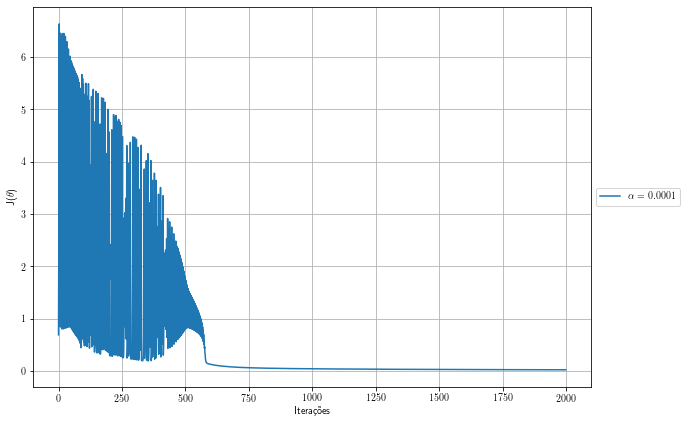

In [209]:
theta = np.zeros((X.shape[1],1))
# alphas=[,0.000001]

J, H_theta, acc = logistic_regression(2000, 0.0001, X.shape[0], X, Y, theta)

#Valores testados 0.0001(comportamento estranho), 0.00001, 
plt.plot(J, label=fr"$\alpha = {0.0001}$")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Iterações')
plt.ylabel(r'J($\theta$)')

Text(0, 0.5, 'Acurácia')

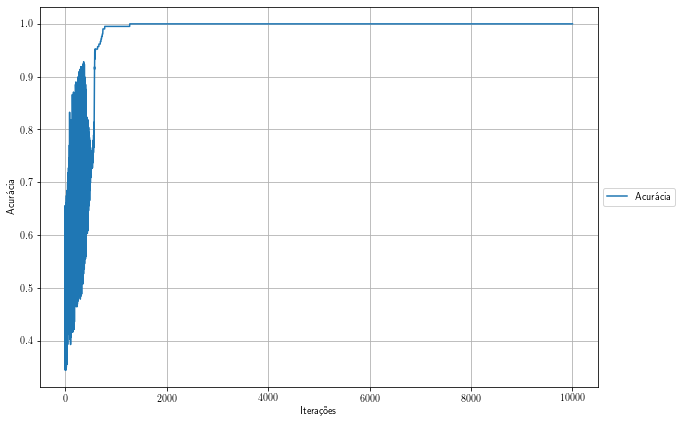

In [207]:
plt.plot(acc, label="Acurácia")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Iterações')
plt.ylabel('Acurácia')

In [166]:
len(H_theta)

209

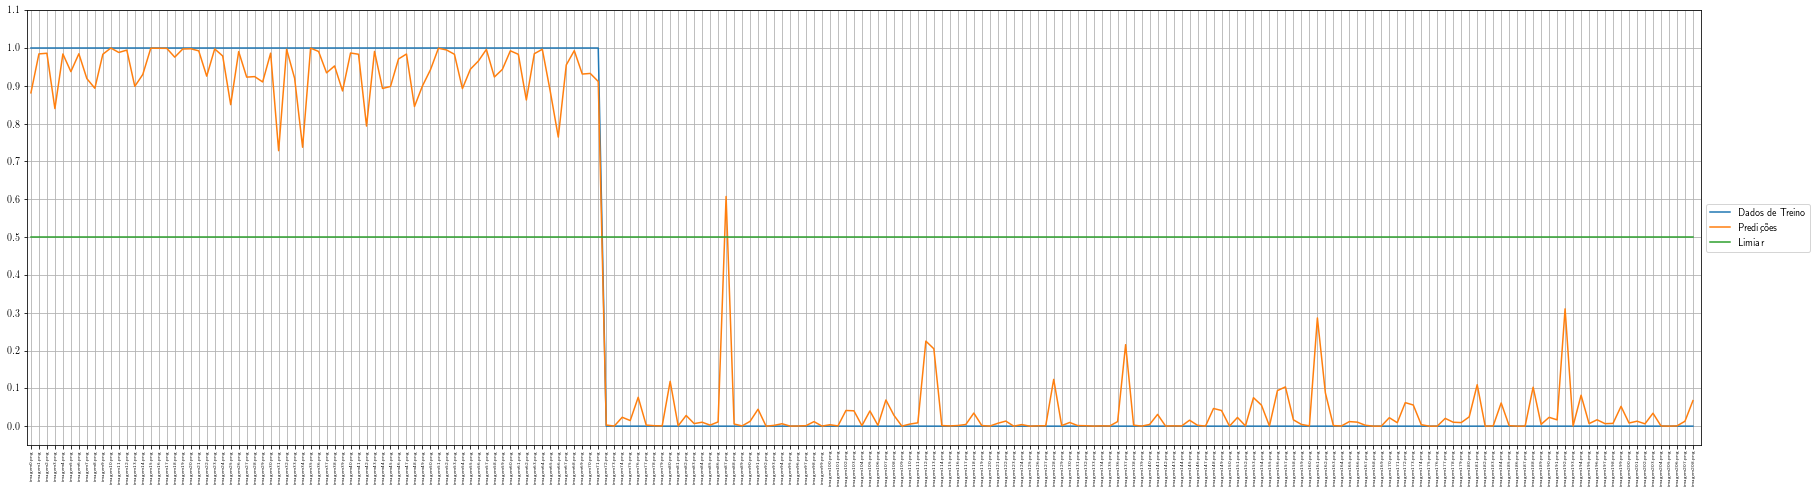

In [167]:
plt.figure(figsize=(30,8))
plt.plot(Y, label="Dados de Treino")
plt.plot(H_theta, label="Predições")
plt.plot([0.5]*len(H_theta), label="Limiar")
plt.yticks(np.arange(-0,1.2,0.1))
plt.xticks(np.arange(209), list(map(lambda x: 'imagem'+str(x)+'.png', range(len(H_theta)))), rotation=90)
plt.tick_params(axis='x', which='major', labelsize=5)
plt.axis(xmin=-0.5, xmax=len(H_theta))
# plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('comparacao.pdf',bbox_inches='tight', transparent=True)
# plt.xlabel('Instâncias')
# plt.ylabel('Resultado')

In [169]:
X = X*255

In [170]:
X.shape

(209, 12289)

In [171]:
X = np.delete(X,obj=0,axis=1)

In [172]:
X.shape

(209, 12288)

Tenho 209 linhas, onde cada linha é uma figura (64x64x3)

In [173]:
len(X[0])

12288

Cada linha do H_Theta é a predição relacionada a uma imagem do dataset

In [174]:
H_theta[2,0]

0.9861314014816527

In [175]:
for i in range(0, len(X)):
    temp = np.uint8(np.reshape(X[i,:], (64,64,3)))
    salva_imagem_com_predicao(temp, f"../results/imagem_{i}.png", H_theta[i,0])

In [191]:
X.shape

(209, 12288)

Acuracia Final = acc[-1]

In [192]:
np.sum(((H_theta >= 0.5) == Y))/X.shape[0]

0.9952153110047847

Isso quer dizer que ele vai acertar 99% das imagens, ou seja, ele vai errar 1% das imagens do **treino**